# Link prediction using networkX library

## Import required libraries

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns
import pandas as pd
from collections import defaultdict

## Read and draw graph

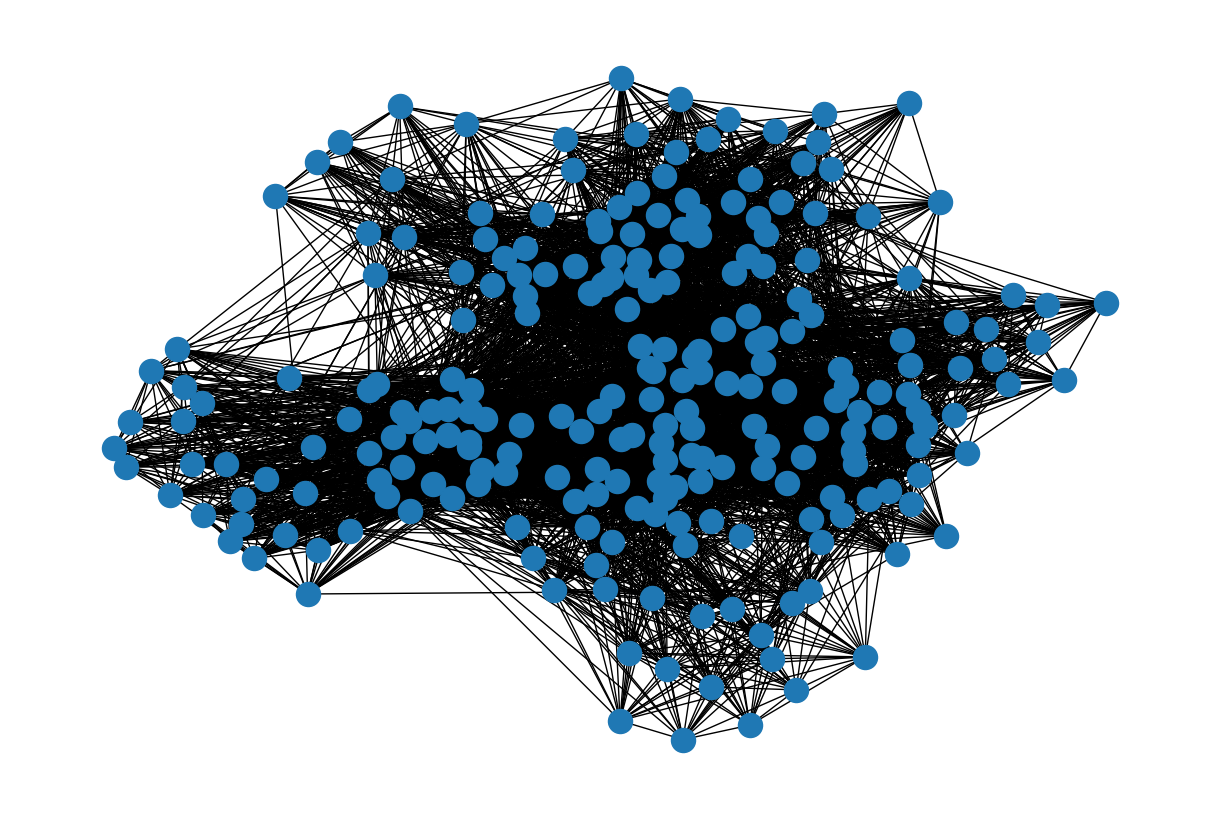

In [6]:
graph = nx.read_gexf("../../data/sp_data_school_day_1_g.gexf")
plt.figure(figsize=(12,8))
nx.draw(graph)

## Print some graph statistics

In [8]:
n = graph.number_of_nodes()
m = graph.number_of_edges()
print(f"Number of nodes: {n}")
print(f"Number of edges: {m}")
print(f"Number of connected components: {nx.number_connected_components(graph)}")

Number of nodes: 236
Number of edges: 5899
Number of connected components: 1


## Defining some helper methods

In [10]:
def random_sample(graph, perc=0.15):
    num_removed_edges = int(perc * graph.number_of_edges())
    edge_subset = random.choices(list(graph.edges()), k=num_removed_edges)
    # Remove some edges
    sample = graph.copy()
    sample.remove_edges_from(edge_subset)
    return sample, edge_subset

In [11]:
def accuracy(predicted_edges, removed_edges):
    sorted_pred = sorted(predicted_edges,key=itemgetter(2), reverse=True)
    top_predictions = sorted_pred[:len(removed_edges)]
    correctly_predicted = [((u,v) in removed_edges) for (u,v,s) in top_predictions]
    accuracy = (sum(correctly_predicted)) / len(correctly_predicted)
    return accuracy

In [12]:
def calculate_communities(graph):
    import community
    partition = community.best_partition(graph)
    
    ## Set community attribute on nodes
    for node, community in partition.items():
        graph.nodes[node]['community'] = community

## Create statistics for various link prediction algorithms on given graph

In [14]:
adamic = "Adamic Adar"
jaccard = "Jaccard"
resource_alloc = "Resource Allocation"
pref_attachment = "Preferential Attachment"
cn_soundarajan = "CN Soundarajan Hopcroft"
ra_index_soudarajan = "RA Index Soudarjan"
within_inter_cluster = "Within Inter Cluster"

prediction_accuracies = defaultdict(list)

print("Start sampling")
for i in range(0, 50):
    if i % 5 == 0:
        print(f"\tIteration: {i}")
    sample_graph, removed_edges = random_sample(graph)
    calculate_communities(sample_graph)
    prediction_accuracies[adamic].append(accuracy(list(nx.adamic_adar_index(sample_graph)), removed_edges))
    prediction_accuracies[jaccard].append(accuracy(list(nx.jaccard_coefficient(sample_graph)), removed_edges))
    prediction_accuracies[resource_alloc].append(accuracy(list(nx.resource_allocation_index(sample_graph)), removed_edges))
    prediction_accuracies[cn_soundarajan].append(accuracy(list(nx.cn_soundarajan_hopcroft(sample_graph)), removed_edges))
    prediction_accuracies[ra_index_soudarajan].append(accuracy(list(nx.ra_index_soundarajan_hopcroft(sample_graph)), removed_edges))
    prediction_accuracies[within_inter_cluster].append(accuracy(list(nx.within_inter_cluster(sample_graph)), removed_edges))
    prediction_accuracies[pref_attachment].append(accuracy(list(nx.preferential_attachment(sample_graph)), removed_edges))

print("Finished Sampling")

Start sampling
	Iteration: 0
	Iteration: 5
	Iteration: 10
	Iteration: 15
	Iteration: 20
	Iteration: 25
	Iteration: 30
	Iteration: 35
	Iteration: 40
	Iteration: 45
Finished Sampling


## Plot sample statistics

C:\Users\michi\AppData\Local\Temp\ipykernel_21628\184755838.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


[Text(0, 0, 'Adamic Adar'),
 Text(1, 0, 'Jaccard'),
 Text(2, 0, 'Resource Allocation'),
 Text(3, 0, 'CN Soundarajan Hopcroft'),
 Text(4, 0, 'RA Index Soudarjan'),
 Text(5, 0, 'Within Inter Cluster'),
 Text(6, 0, 'Preferential Attachment')]

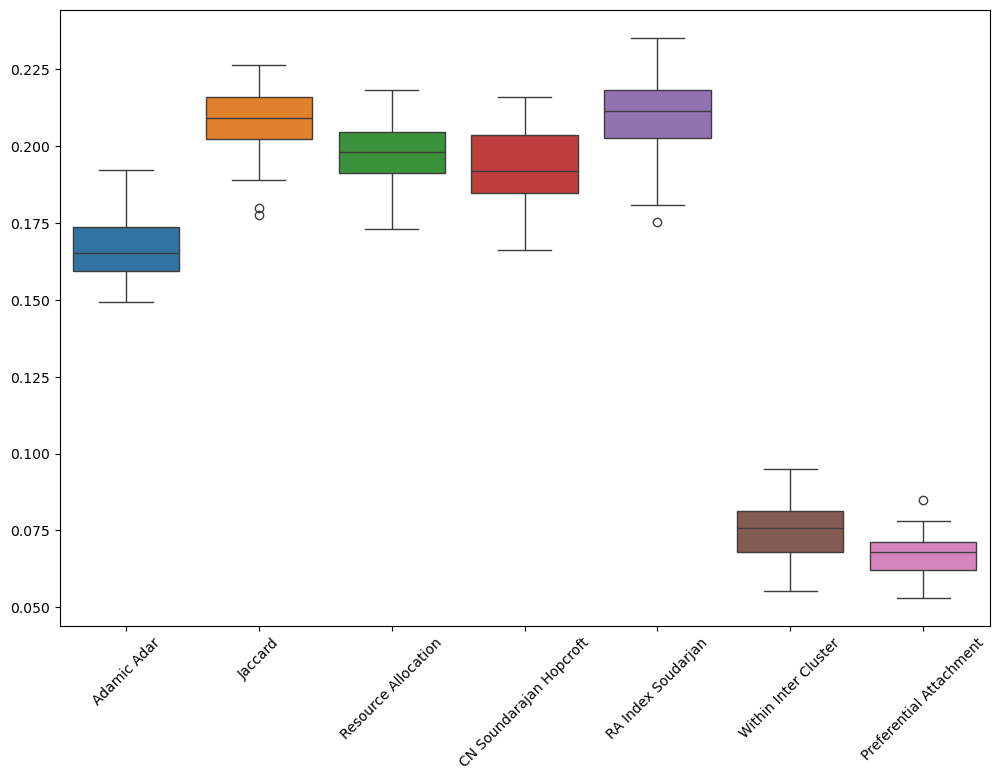

In [16]:
plt.figure(figsize=(12,8))
chart = sns.boxplot(data=pd.DataFrame.from_dict(prediction_accuracies), orient='v')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)